In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("btc_1h_data_2018_to_2025.csv")

In [4]:
df.head(10)

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2018-01-01 00:00:00,13715.65,13715.65,13400.01,13529.01,443.356199,2018-01-01 00:59:59.999,5.993910e+06,5228,228.521921,3.090541e+06,0
1,2018-01-01 01:00:00,13528.99,13595.89,13155.38,13203.06,383.697006,2018-01-01 01:59:59.999,5.154522e+06,4534,180.840403,2.430449e+06,0
2,2018-01-01 02:00:00,13203.00,13418.43,13200.00,13330.18,429.064572,2018-01-01 02:59:59.999,5.710192e+06,4887,192.237935,2.558505e+06,0
3,2018-01-01 03:00:00,13330.26,13611.27,13290.00,13410.03,420.087030,2018-01-01 03:59:59.999,5.657448e+06,4789,137.918407,1.858041e+06,0
4,2018-01-01 04:00:00,13434.98,13623.29,13322.15,13601.01,340.807329,2018-01-01 04:59:59.999,4.588047e+06,4563,172.957635,2.328058e+06,0
5,2018-01-01 05:00:00,13615.20,13699.00,13526.50,13558.99,404.229046,2018-01-01 05:59:59.999,5.499055e+06,5086,142.331058,1.935710e+06,0
6,2018-01-01 06:00:00,13539.00,13800.00,13510.00,13780.41,264.989684,2018-01-01 06:59:59.999,3.613408e+06,4072,126.077500,1.718753e+06,0
7,2018-01-01 07:00:00,13780.00,13818.55,13555.02,13570.35,292.188777,2018-01-01 07:59:59.999,4.002026e+06,4340,147.150029,2.016275e+06,0
8,2018-01-01 08:00:00,13569.98,13735.24,13400.00,13499.99,271.813553,2018-01-01 08:59:59.999,3.681944e+06,3733,122.809696,1.664737e+06,0
9,2018-01-01 09:00:00,13499.97,13670.00,13459.11,13616.99,213.095829,2018-01-01 09:59:59.999,2.893105e+06,3128,96.470199,1.309921e+06,0


In [5]:
df['Open time'] = pd.to_datetime(df['Open time'])

In [6]:
df.set_index('Open time', inplace=True)

In [7]:
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [8]:
df.dropna(inplace=True)

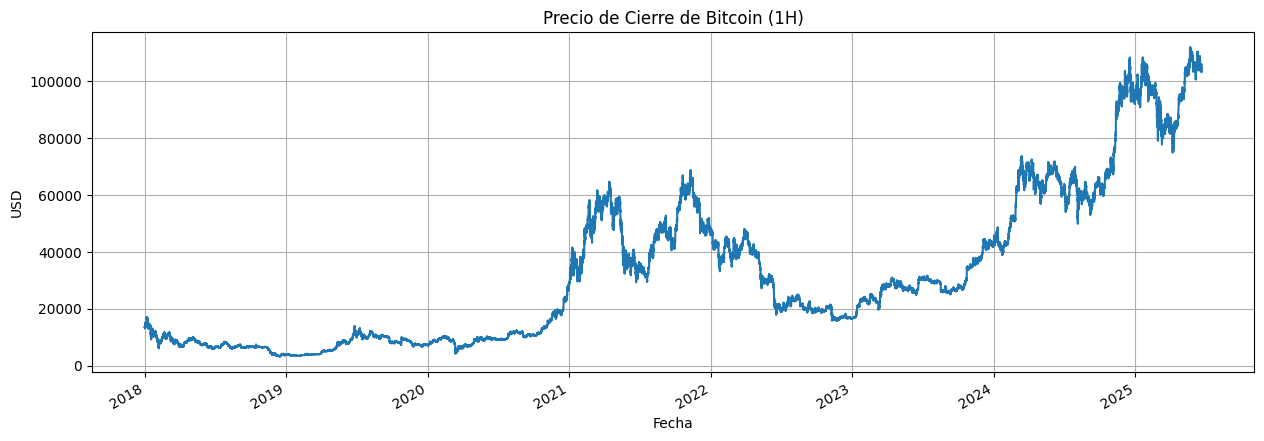

In [9]:
plt.figure(figsize=(15, 5))
df['Close'].plot(title='Precio de Cierre de Bitcoin (1H)')
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.grid(True)
plt.show()

In [10]:
# 8️⃣ Crear variable objetivo (Target: 1 si sube, 0 si no sube)
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Verificar la distribución de la variable objetivo
df['Target'].value_counts(normalize=True)


Target
1    0.508669
0    0.491331
Name: proportion, dtype: float64

In [11]:
# Retorno porcentual de la última hora
df['return_1h'] = df['Close'].pct_change()


In [12]:
# Media móvil simple (SMA)
df['sma_6'] = df['Close'].rolling(window=6).mean()
df['sma_12'] = df['Close'].rolling(window=12).mean()

In [13]:


# Volatilidad (desviación estándar de las últimas 6 horas)
df['volatility_6h'] = df['Close'].rolling(window=6).std()


In [14]:
# RSI (Relative Strength Index) - Función auxiliar
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = delta.clip(lower=0).rolling(window=window).mean()
    loss = (-delta.clip(upper=0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

In [15]:

df['RSI_14'] = compute_rsi(df['Close'])

In [16]:
# Eliminar filas con NaN (por rolling o shift)
df.dropna(inplace=True)

In [17]:
# Verificar columnas finales
df[['Close', 'return_1h', 'sma_6', 'sma_12', 'volatility_6h', 'RSI_14', 'Target']].head()

,Close,return_1h,sma_6,sma_12,volatility_6h,RSI_14,Target
Open time,,,,,,,
2018-01-01 14:00:00,13211.39,0.014934,13301.395000,13435.762500,238.287426,42.712263,1
2018-01-01 15:00:00,13247.00,0.002695,13239.730000,13422.176667,181.354716,51.163172,0
2018-01-01 16:00:00,13018.00,-0.017287,13147.728333,13373.592500,103.673660,42.158961,1
2018-01-01 17:00:00,13022.00,0.000307,13114.635000,13328.843333,107.399524,39.867769,1
2018-01-01 18:00:00,13135.00,0.008678,13108.398333,13275.059167,104.417949,37.314969,1


In [20]:
split_index = int(len(df) * 0.8)

train = df.iloc[:split_index]
test = df.iloc[split_index:]


In [21]:

# Variables predictoras (features) y objetivo
features = ['return_1h', 'sma_6', 'sma_12', 'volatility_6h', 'RSI_14']
X_train, y_train = train[features], train['Target']
X_test, y_test = test[features], test['Target']

In [22]:

# Verificar tamaños
print(f"Entrenamiento: {X_train.shape}, Test: {X_test.shape}")


Entrenamiento: (52269, 5), Test: (13068, 5)


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# 11️⃣ Entrenamiento del modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [25]:
# 12️⃣ Predicciones
y_pred = model.predict(X_test)

# 13️⃣ Evaluación del modelo
print("📊 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

📊 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.50      0.70      0.58      6424
           1       0.53      0.32      0.40      6644

    accuracy                           0.51     13068
   macro avg       0.51      0.51      0.49     13068
weighted avg       0.51      0.51      0.49     13068



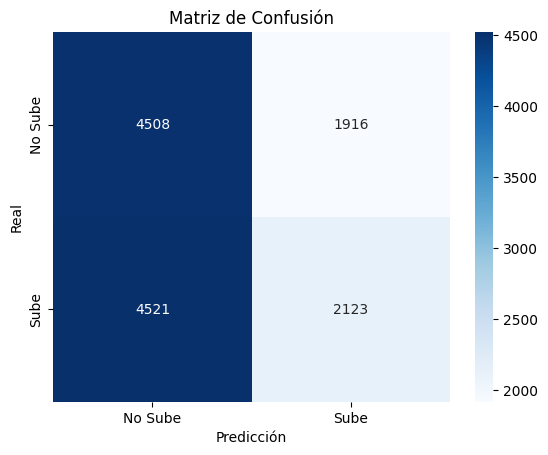

In [26]:
# 14️⃣ Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sube', 'Sube'], yticklabels=['No Sube', 'Sube'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [1]:
import requests
from datetime import datetime

start_date = "2018-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")

url = f"https://ccaf.io/cbnsi/cbeci/download/data?scope=custom&frequency=power_demand&start={start_date}&end={end_date}"

headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

with open("bitcoin_energy_consumption.csv", "wb") as f:
    f.write(response.content)

print("✅ Descarga completa")


✅ Descarga completa
